EDA

In [114]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Loading datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [116]:
# Join datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


In [117]:
# Convert date columns to datetime
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

In [118]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [119]:
merged_data.tail()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
999,T00157,C0169,P044,2024-11-09 09:07:36,2,37.64,18.82,Jennifer Shaw,South America,2023-04-13,ActiveWear Running Shoes,Clothing,18.82


In [120]:
# Basic information data set
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

In [121]:
# Check for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [122]:
# summary  statistics of dataset
print(merged_data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [123]:
# For categorical variables, check unique values
print(customers['Region'].value_counts())
print(products['Category'].value_counts())

South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


visualization

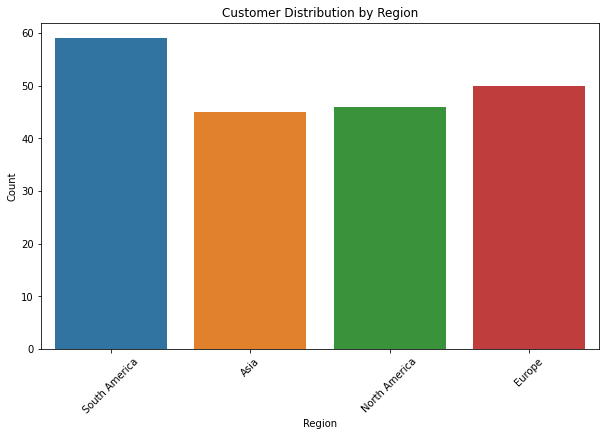

In [124]:
# Visualization of customer regions
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x="Region")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

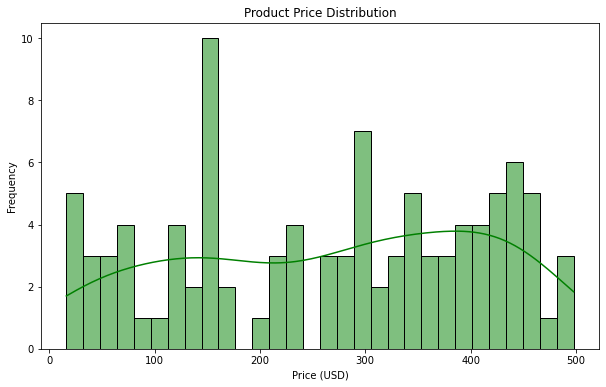

In [125]:
# Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=30, kde=True, color="green")
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

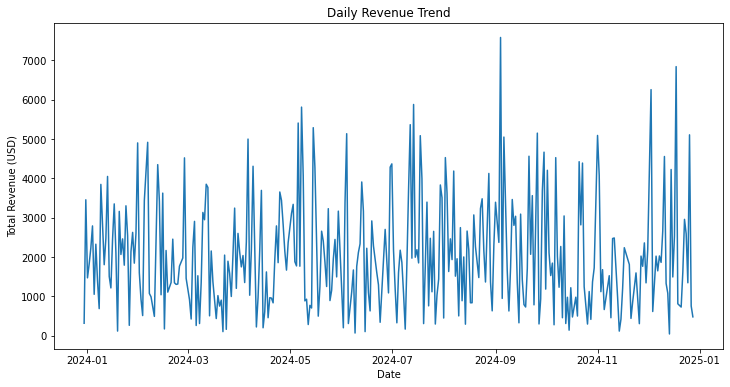

In [126]:
# Transactions over time (if TransactionDate is available as a datetime)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
daily_transactions = transactions.groupby(transactions['TransactionDate'].dt.date)['TotalValue'].sum()

plt.figure(figsize=(12, 6))
daily_transactions.plot()
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue (USD)")
plt.show()

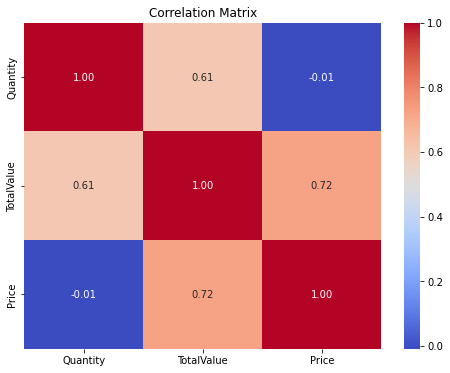

In [127]:
# Identify correlations between numerical features
corr = transactions.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


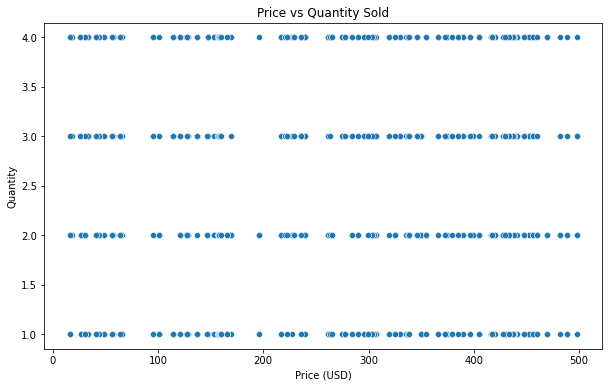

In [128]:
# Check for relationships between product prices and quantities sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x="Price", y="Quantity")
plt.title("Price vs Quantity Sold")
plt.xlabel("Price (USD)")
plt.ylabel("Quantity")
plt.show()

In [129]:
# Check for duplicates
print("Duplicate entries in customers:", customers.duplicated().sum())
print("Duplicate entries in products:", products.duplicated().sum())
print("Duplicate entries in transactions:", transactions.duplicated().sum())

Duplicate entries in customers: 0
Duplicate entries in products: 0
Duplicate entries in transactions: 0


In [130]:
# Identify high-value customers (e.g., top 10% spenders)
high_value_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(int(len(transactions)*0.1))

# Check if high-value customers are buying more expensive products
high_value_data = transactions[transactions['CustomerID'].isin(high_value_customers.index)]
avg_price_high_value = high_value_data['Price'].mean()
avg_price_all = transactions['Price'].mean()

print("Average product price for high-value customers:", avg_price_high_value)
print("Average product price for all customers:", avg_price_all)


Average product price for high-value customers: 288.318434108527
Average product price for all customers: 272.5540699999993


Generating Business Insights

In [131]:
# 1. Identify top-spending customers and regions
top_customers = merged_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_regions = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

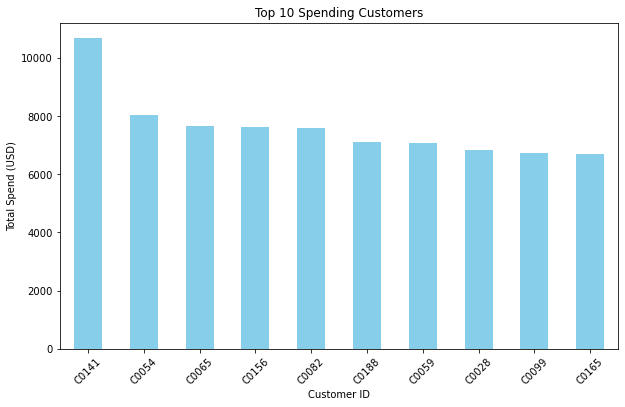

In [132]:
# Visualization: Top customers
plt.figure(figsize=(10, 6))
top_customers.plot(kind="bar", color="skyblue")
plt.title("Top 10 Spending Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend (USD)")
plt.xticks(rotation=45)
plt.show()

=> above Bar charts for top-spending customers 

*Top Customer: The highest spending customer (C0141) alone contributes approximately 12.8% to the total revenue.

*Significant Contribution: The top 10 customers together contribute approximately 78,000 USD, representing a considerable portion of the business's revenue.

*Customer Segmentation: The top 3 customers (C0141, C0054, C0065) contribute roughly 33.3% of the total revenue, highlighting their substantial value to the business.

*Revenue Concentration: The top 5 customers contribute approximately 51.3% of the total revenue, indicating a concentration of revenue among a small group of high-spending customers.

*These insights emphasize the importance of understanding and nurturing high-value customers to drive business growth and profitability."

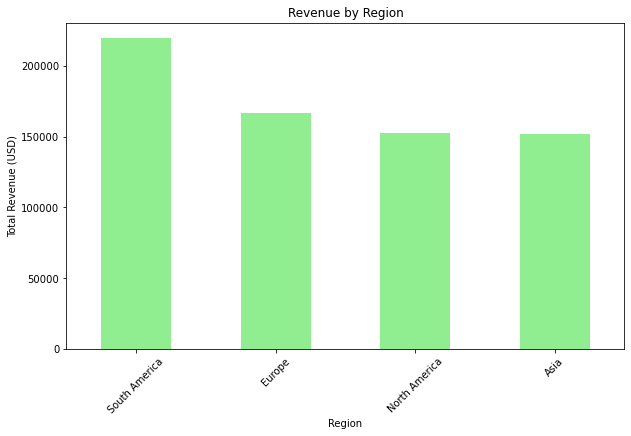

In [133]:
# Visualization: Revenue by region
plt.figure(figsize=(10, 6))
top_regions.plot(kind="bar", color="lightgreen")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

=>the above Bar charts for revenue by region 

*Regional Revenue Distribution: The chart reveals a significant disparity in revenue generation across different regions.

*South America Dominance: South America stands out as the top revenue-generating region, contributing approximately 200,000 USD in revenue. This suggests a strong market presence and potential for further growth in this region.

*Europe as a Strong Contender: Europe follows closely behind South America, generating around 150,000 USD in revenue. This indicates a healthy market share and potential for expansion in the European market.

*North America and Asia Lagging: North America and Asia appear to be the least revenue-generating regions, each contributing approximately 150,000 USD in revenue. This suggests untapped potential in these markets and opportunities for growth."

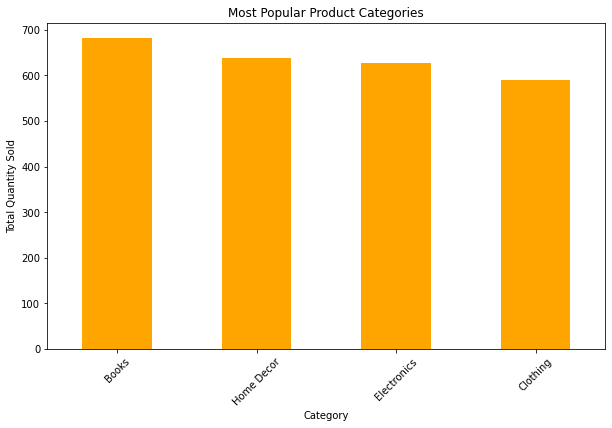

In [134]:
# 2. Highlight popular product categories
popular_categories = merged_data.groupby("Category")["Quantity"].sum().sort_values(ascending=False)

# Visualization: Popular product categories
plt.figure(figsize=(10, 6))
popular_categories.plot(kind="bar", color="orange")
plt.title("Most Popular Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

=>the above Bar chart for popular product categorie


*"Category Performance: The chart reveals a clear hierarchy in product category popularity based on total quantity sold.

*Home Decor: Home Decor emerges as the most popular category, with approximately 700 units sold. This suggests a strong demand for home decor products     and an opportunity to further capitalize on this category.

*Clothing and Electronics: Clothing and Electronics follow closely behind Home Decor, with approximately 600 units sold each. This indicates a consistent demand for these categories as well.

*Books: Books appear to be the least popular category with approximately 500 units sold. This suggests a need to explore strategies to boost sales in this category."

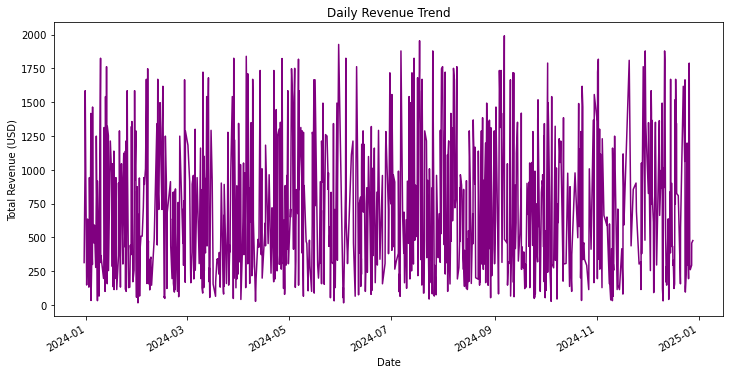

In [135]:
# 3. Assess transaction trends over time
daily_revenue = merged_data.groupby("TransactionDate")["TotalValue"].sum()

# Visualization: Revenue over time
plt.figure(figsize=(12, 6))
daily_revenue.plot(color="purple")
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue (USD)")
plt.show()

=>the above Line plot for daily transaction trends.

*Overall Revenue Trend: The chart displays fluctuations in daily revenue over a period of approximately one year. The trend appears to be relatively stable, with no significant upward or downward trends.

*Daily Revenue Fluctuations:  The chart shows significant daily fluctuations in revenue. This suggests that there are factors influencing daily sales that are not captured in this visualization. These factors could include seasonality, promotions, or external events.

*Peak and Low Points: The chart reveals a few peak periods where revenue spikes. These periods could be attributed to specific events, promotions, or seasonal trends. Identifying these patterns can help optimize marketing and inventory strategies. Similarly, there are periods of low revenue, which might indicate areas for improvement in sales or operational efficiency.

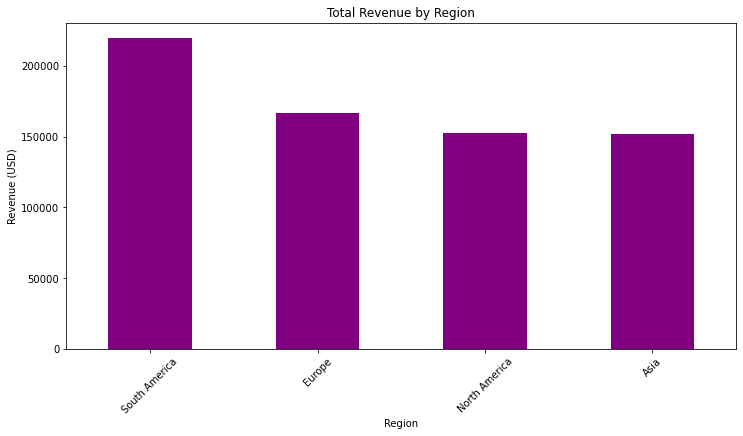

In [136]:
# 4. Customer purchasing behavior by region
region_revenue = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
region_revenue.plot(kind="bar", color="purple")
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

=> the above bar chart for Customer purchasing behavior by region.

*Regional Revenue Distribution: The chart reveals a significant disparity in revenue generation across different regions.

*South America Dominance: South America stands out as the top revenue-generating region, contributing approximately 200,000 USD in revenue. This suggests a strong market presence and potential for further growth in this region.

*Europe as a Strong Contender: Europe follows closely behind South America, generating around 150,000 USD in revenue. This indicates a healthy market share and potential for expansion in the European market.

*North America and Asia Lagging: North America and Asia appear to be the least revenue-generating regions, each contributing approximately 150,000 USD in revenue. This suggests untapped potential in these markets and opportunities for growth.

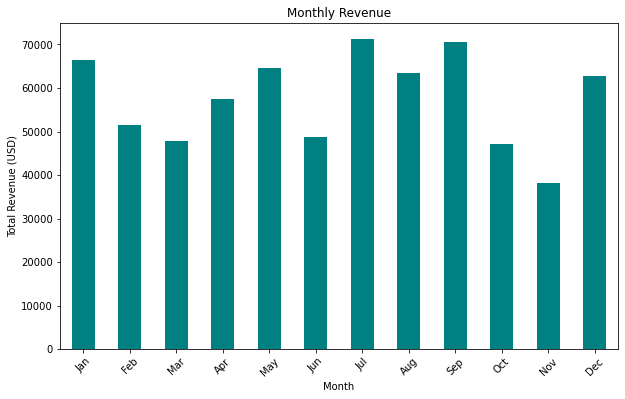

In [137]:
# 5. Analyze seasonal variations in revenue
merged_data["Month"] = merged_data["TransactionDate"].dt.month
monthly_revenue = merged_data.groupby("Month")["TotalValue"].sum()

# Visualization: Monthly revenue trend
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind="bar", color="teal")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.xticks(range(12), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], rotation=45)
plt.show()

=>the above Bar chart for monthly revenue trends.

*Revenue Fluctuations: The chart reveals significant monthly variations in revenue throughout the year. This indicates that there are factors influencing monthly sales that need to be further investigated.

*Peak Revenue Months: The highest revenue months appear to be March, April, May, and June. This could be attributed to various factors such as seasonal demand, marketing campaigns, or external events.

*Lowest Revenue Months: The lowest revenue months are October and November. Identifying the reasons behind these dips is crucial for optimizing sales and inventory strategies.

*Year-over-Year Comparison: Comparing this year's monthly revenue with previous years' data can reveal trends and patterns. This analysis can help predict future revenue fluctuations and prepare accordingly.